In [1]:
using Distributed
addprocs(8);

In [2]:
@everywhere using PulseInputDDM, MAT
using Flatten

In [3]:
x_joint = Vector(undef, 3);
x_choice = Vector(undef, 3);

In [4]:
ratnames = ["B068","T034","T036","T063","T030", "T035","T011","B053", "T080","T103","E021"];
dt, n, cross = 1e-2, 53, false
data_path = joinpath(abspath(joinpath(pwd(), "..")), "data/by_session_w_cpoke")
joint_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/joint");
choice_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/choice");

## PPC

In [5]:
region, delay = "PPC", 12
ratnum = 6:8
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_PPC, μ_rnt, μ_t, cpoke_out_PPC = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, 
    delay=delay, dt=dt, filtSD=5, do_RBF=true);

In [6]:
file = joinpath(joint_model_path, "Fig2-PPC.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];  
x_joint[2] = xf;
joint_model_PPC = neural_choiceDDM(θneural_choice(xf, f), n, cross)

neural_choiceDDM{θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}}
  θ: θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}
  n: Int64 53
  cross: Bool false


In [7]:
file = joinpath(choice_model_path, region*".mat")
x_choice[2] = read(matopen(file), "ML_params");

In [8]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_PPC...), :input_data));
choice_data_PPC = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_PPC...), :choice));
choice_model_PPC = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[2]), n=n, cross=cross);

## ADS

In [9]:
region, delay = "ADS", 6
ratnum = 9:11
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_STR,μ_rnt, μ_t, cpoke_out_STR = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [10]:
file = joinpath(joint_model_path, "Fig2-ADS.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   
x_joint[3] = xf;
joint_model_STR = neural_choiceDDM(θneural_choice(xf, f), n, cross)

neural_choiceDDM{θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}}
  θ: θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}
  n: Int64 53
  cross: Bool false


In [11]:
file = joinpath(choice_model_path, region*".mat")
x_choice[3] = read(matopen(file), "ML_params");

In [12]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_STR...), :input_data));
choice_data_STR = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_STR...), :choice));
choice_model_STR = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[3]), n=n, cross=cross);

## FOF

In [13]:
region, delay = "FOF", 6
ratnum = 1:5
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_FOF,μ_rnt, μ_t, cpoke_out_FOF = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [14]:
file = joinpath(joint_model_path, "Fig2-FOF.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   
x_joint[1] = xf;
joint_model_FOF = neural_choiceDDM(θneural_choice(xf, f), n, cross)

neural_choiceDDM{θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}}
  θ: θneural_choice{θz{Float64}, Float64, Vector{Vector{Softplus{Float64}}}}
  n: Int64 53
  cross: Bool false


In [15]:
file = joinpath(choice_model_path, region*".mat")
x_choice[1] = read(matopen(file), "ML_params");

In [16]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_FOF...), :input_data));
choice_data_FOF = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_FOF...), :choice));
choice_model_FOF = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[1]), n=n, cross=cross);

### Compute difference in L and R clicks

In [17]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_data_FOF);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_FOF = cumsum.(-L .+ R);

In [18]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_data_PPC);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_PPC = cumsum.(-L .+ R);

In [19]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_data_STR);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_STR = cumsum.(-L .+ R);

## Forward pass and posteriors

In [20]:
import PulseInputDDM: forward, posterior

In [21]:
output = forward(choice_model_FOF, choice_data_FOF);
choice_a_FOF = map(x-> x[1], output);
xc_choice_FOF = output[1][2];

In [22]:
output = forward(choice_model_PPC, choice_data_PPC);
choice_a_PPC = map(x-> x[1], output);
xc_choice_PPC = output[1][2];

In [23]:
output = forward(choice_model_STR, choice_data_STR);
choice_a_STR = map(x-> x[1], output);
xc_choice_STR = output[1][2];

In [24]:
neural_model_FOF = neuralDDM(θ=θneural(θz=joint_model_FOF.θ.θz, θy=joint_model_FOF.θ.θy, f=joint_model_FOF.θ.f),
    n=joint_model_FOF.n, cross=joint_model_FOF.cross);

In [25]:
neural_model_PPC = neuralDDM(θ=θneural(θz=joint_model_PPC.θ.θz, θy=joint_model_PPC.θ.θy, f=joint_model_PPC.θ.f),
    n=joint_model_PPC.n, cross=joint_model_PPC.cross);

In [26]:
neural_model_STR = neuralDDM(θ=θneural(θz=joint_model_STR.θ.θz, θy=joint_model_STR.θ.θy, f=joint_model_STR.θ.f),
    n=joint_model_STR.n, cross=joint_model_STR.cross);

In [27]:
output = posterior(neural_model_FOF, data_FOF);
output = vcat(output...);
neural_post_FOF = map(x-> x[1] .* x[2], output);
xc_neural_FOF = output[1][3];

In [28]:
output = posterior(neural_model_PPC, data_PPC);
output = vcat(output...);
neural_post_PPC = map(x-> x[1] .* x[2], output);
xc_neural_PPC = output[1][3];

In [29]:
output = posterior(neural_model_STR, data_STR);
output = vcat(output...);
neural_post_STR = map(x-> x[1] .* x[2], output);
xc_neural_STR = output[1][3];

#### Expected values

In [30]:
exp_PPC_neural = map(x-> x[:,33:end-8]' * xc_neural_PPC, neural_post_PPC);
exp_FOF_neural = map(x-> x[:,27:end-14]' * xc_neural_FOF, neural_post_FOF);
exp_STR_neural = map(x-> x[:,27:end-14]' * xc_neural_STR, neural_post_STR);

In [31]:
exp_PPC_choice_for = map(x-> x' * xc_choice_PPC, choice_a_PPC);
exp_FOF_choice_for = map(x-> x' * xc_choice_FOF, choice_a_FOF);
exp_STR_choice_for = map(x-> x' * xc_choice_STR, choice_a_STR);

In [32]:
import Statistics: median

## Find change of mind

In [33]:
# compute the diff of the thresholded expected posterior

In [34]:
diff_choice_STR = map(x-> diff(x .< choice_model_STR.θ.bias), exp_STR_choice_for);
diff_neural_STR = map(x-> diff(x .< joint_model_STR.θ.bias), exp_STR_neural);
diff_LR_STR = map(x-> diff(x .< 0.), ΔLR_STR);

diff_choice_FOF = map(x-> diff(x .< choice_model_FOF.θ.bias), exp_FOF_choice_for);
diff_LR_FOF = map(x-> diff(x .< 0.), ΔLR_FOF);
diff_neural_FOF = map(x-> diff(x .< joint_model_FOF.θ.bias), exp_FOF_neural);

diff_choice_PPC = map(x-> diff(x .< choice_model_PPC.θ.bias), exp_PPC_choice_for);
diff_LR_PPC = map(x-> diff(x .< 0.), ΔLR_PPC);
diff_neural_PPC = map(x-> diff(x .< joint_model_PPC.θ.bias), exp_PPC_neural);

In [35]:
# find the zero crossings

In [36]:
find_diff_choice_PPC = map(x-> findall(x .!= 0), diff_choice_PPC);
find_diff_choice_STR = map(x-> findall(x .!= 0), diff_choice_STR);
find_diff_choice_FOF = map(x-> findall(x .!= 0), diff_choice_FOF);

find_diff_LR_PPC = map(x-> findall(x .!= 0), diff_LR_PPC);
find_diff_LR_STR = map(x-> findall(x .!= 0), diff_LR_STR);
find_diff_LR_FOF = map(x-> findall(x .!= 0), diff_LR_FOF);

find_diff_neural_PPC = map(x-> findall(x .!= 0), diff_neural_PPC);
find_diff_neural_STR = map(x-> findall(x .!= 0), diff_neural_STR);
find_diff_neural_FOF = map(x-> findall(x .!= 0), diff_neural_FOF);

In [37]:
# find the trials which have zero crossings (putative events)

In [38]:
which_trials_PPC_LR = findall(length.(find_diff_LR_PPC) .!= 0);
which_trials_FOF_LR = findall(length.(find_diff_LR_FOF) .!= 0);
which_trials_STR_LR = findall(length.(find_diff_LR_STR) .!= 0);

In [39]:
which_trials_PPC_neural = findall(length.(find_diff_neural_PPC) .!= 0);
which_trials_FOF_neural = findall(length.(find_diff_neural_FOF) .!= 0);
which_trials_STR_neural = findall(length.(find_diff_neural_STR) .!= 0);

In [40]:
which_trials_PPC_choice = findall(length.(find_diff_choice_PPC) .!= 0);
which_trials_FOF_choice = findall(length.(find_diff_choice_FOF) .!= 0);
which_trials_STR_choice = findall(length.(find_diff_choice_STR) .!= 0);

In [41]:
#include(joinpath(abspath(joinpath(pwd(), "..")), "src/change-of-mind.jl"));
import DePasqualeElife2024: CoM

In [42]:
# use a more conservative threshold to find the events

In [43]:
thresh = joint_model_PPC.θ.bias
margin = 2
x = exp_PPC_neural
which_trials = which_trials_PPC_neural
events = find_diff_neural_PPC;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_PPC_neural = map(x-> getindex.(x, 1), output)
isevent_PPC_neural = map(x-> getindex.(x, 4), output);

In [44]:
thresh = joint_model_STR.θ.bias
margin = 2
x = exp_STR_neural
which_trials = which_trials_STR_neural
events = find_diff_neural_STR;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_STR_neural = map(x-> getindex.(x, 1), output)
isevent_STR_neural = map(x-> getindex.(x, 4), output);

In [45]:
thresh = joint_model_FOF.θ.bias
margin = 2
x = exp_FOF_neural
which_trials = which_trials_FOF_neural
events = find_diff_neural_FOF;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_FOF_neural = map(x-> getindex.(x, 1), output)
isevent_FOF_neural = map(x-> getindex.(x, 4), output);

In [46]:
thresh = choice_model_FOF.θ.bias
margin = 2
x = exp_FOF_choice_for
which_trials = which_trials_FOF_choice
events = find_diff_choice_FOF;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_FOF_choice = map(x-> getindex.(x, 1), output)
isevent_FOF_choice = map(x-> getindex.(x, 4), output);

In [47]:
thresh = choice_model_PPC.θ.bias
margin = 2
x = exp_PPC_choice_for
which_trials = which_trials_PPC_choice
events = find_diff_choice_PPC;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_PPC_choice = map(x-> getindex.(x, 1), output)
isevent_PPC_choice = map(x-> getindex.(x, 4), output);

In [48]:
thresh = choice_model_STR.θ.bias
margin = 2
x = exp_STR_choice_for
which_trials = which_trials_STR_choice
events = find_diff_choice_STR;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_STR_choice = map(x-> getindex.(x, 1), output)
isevent_STR_choice = map(x-> getindex.(x, 4), output);

In [49]:
thresh = 0
margin = 2
x = ΔLR_FOF
which_trials = which_trials_FOF_LR
events = find_diff_LR_FOF;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_FOF_LR = map(x-> getindex.(x, 1), output)
isevent_FOF_LR = map(x-> getindex.(x, 4), output);

In [50]:
thresh = 0
margin = 2
x = ΔLR_PPC
which_trials = which_trials_PPC_LR
events = find_diff_LR_PPC;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_PPC_LR = map(x-> getindex.(x, 1), output)
isevent_PPC_LR = map(x-> getindex.(x, 4), output);

In [51]:
thresh = 0
margin = 2
x = ΔLR_STR
which_trials = which_trials_STR_LR
events = find_diff_LR_STR;

output = map((x,y)-> map(y-> CoM(x, y, thresh, margin), y), 
        getindex(x, which_trials), 
        getindex(events, which_trials));

y_STR_LR = map(x-> getindex.(x, 1), output)
isevent_STR_LR = map(x-> getindex.(x, 4), output);

In [52]:
# find the trials that have putative crossings...
selected_neural_events_FOF = getindex(find_diff_neural_FOF, which_trials_FOF_neural);

In [53]:
#...then select the ones that actual do from that shorter list
selected_neural_events_FOF = vcat(selected_neural_events_FOF...)[vcat(isevent_FOF_neural...)];

In [54]:
# do this for all datasets

In [55]:
selected_neural_events_PPC = getindex(find_diff_neural_PPC, which_trials_PPC_neural);
selected_neural_events_PPC = vcat(selected_neural_events_PPC...)[vcat(isevent_PPC_neural...)];
selected_neural_events_STR = getindex(find_diff_neural_STR, which_trials_STR_neural);
selected_neural_events_STR = vcat(selected_neural_events_STR...)[vcat(isevent_STR_neural...)];

In [56]:
selected_choice_events_FOF = getindex(find_diff_choice_FOF, which_trials_FOF_choice);
selected_choice_events_FOF = vcat(selected_choice_events_FOF...)[vcat(isevent_FOF_choice...)];
selected_choice_events_PPC = getindex(find_diff_choice_PPC, which_trials_PPC_choice);
selected_choice_events_PPC = vcat(selected_choice_events_PPC...)[vcat(isevent_PPC_choice...)];
selected_choice_events_STR = getindex(find_diff_choice_STR, which_trials_STR_choice);
selected_choice_events_STR = vcat(selected_choice_events_STR...)[vcat(isevent_STR_choice...)];

In [57]:
selected_LR_events_FOF = getindex(find_diff_LR_FOF, which_trials_FOF_LR);
selected_LR_events_FOF = vcat(selected_LR_events_FOF...)[vcat(isevent_FOF_LR...)];
selected_LR_events_PPC = getindex(find_diff_LR_PPC, which_trials_PPC_LR);
selected_LR_events_PPC = vcat(selected_LR_events_PPC...)[vcat(isevent_PPC_LR...)];
selected_LR_events_STR = getindex(find_diff_LR_STR, which_trials_STR_LR);
selected_LR_events_STR = vcat(selected_LR_events_STR...)[vcat(isevent_STR_LR...)];

## Show nice change of mind events

In [58]:
FOF_switches = which_trials_FOF_neural[any.(isevent_FOF_neural)];
PPC_switches = which_trials_PPC_neural[any.(isevent_PPC_neural)];
STR_switches = which_trials_STR_neural[any.(isevent_STR_neural)];

In [59]:
using Colors, PyPlot
mycolors = ["red", "#1822A0", "#A01892"]

3-element Vector{String}:
 "red"
 "#1822A0"
 "#A01892"

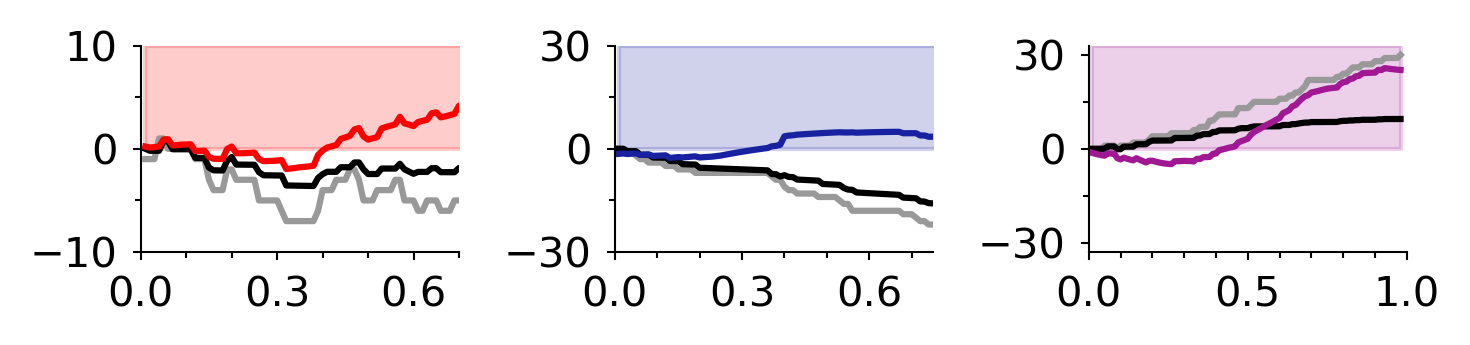

In [60]:
fig, ax = subplots(1, 3, figsize=(5, 1.25), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

tri = FOF_switches[188]
T = length(exp_FOF_neural[tri])

splt = 1
ax[splt].plot(collect(1:T)*dt, ΔLR_FOF[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(collect(1:T)*dt, exp_FOF_choice_for[tri], color="black", label="choice")
ax[splt].plot(collect(1:T)*dt, exp_FOF_neural[tri], color=mycolors[1], label="joint", linestyle="-")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    10 * (2 * choice_data_FOF[tri].choice - 1) * ones(T), zeros(T),
    alpha=0.2, color=mycolors[1]) 

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].set_xticks(range(0., stop=0.6, length=3), minor=false)
ax[splt].set_xticks(range(0., stop=0.8, length=9), minor=true)
ax[splt].set_yticks(range(-10, stop=10, length=3), minor=false)
ax[splt].set_yticks(range(-10, stop=10, length=5), minor=true)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_ylim(-10,10)
ax[splt].set_xlim(0,0.7)

tri = PPC_switches[250]
T = length(exp_PPC_neural[tri])

splt = 2
ax[splt].plot(collect(1:T)*dt, ΔLR_PPC[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(collect(1:T)*dt, exp_PPC_choice_for[tri], color="black", label="choice")
ax[splt].plot(collect(1:T)*dt, exp_PPC_neural[tri], color=mycolors[2], label="joint", linestyle="-")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    30 * (2 * choice_data_PPC[tri].choice - 1) * ones(T), zeros(T),
    alpha=0.2, color=mycolors[2]) 

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].set_xticks(range(0., stop=0.6, length=3), minor=false)
ax[splt].set_xticks(range(0., stop=0.8, length=9), minor=true)
ax[splt].set_yticks(range(-30, stop=30, length=3), minor=false)
ax[splt].set_yticks(range(-30, stop=30, length=5), minor=true)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_ylim(-30,30)
ax[splt].set_xlim(0,0.75)


tri = 67
T = length(exp_STR_neural[tri])

splt = 3
ax[splt].plot(collect(1:T)*dt, ΔLR_STR[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(collect(1:T)*dt, exp_STR_choice_for[tri],  color="black", label="choice")
ax[splt].plot(collect(1:T)*dt, exp_STR_neural[tri], color=mycolors[3], label="joint", linestyle="-")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    33 * ones(T), zeros(T),
    alpha=0.2, color=mycolors[3]) 

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)

ax[splt].set_xticks(range(0., stop=1.0, length=3), minor=false)
ax[splt].set_xticks(range(0., stop=1.0, length=11), minor=true)
ax[splt].set_yticks(range(-30, stop=30, length=3), minor=false)
ax[splt].set_yticks(range(-30, stop=30, length=5), minor=true)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].tick_params(which="minor", width=0.5, length=1.5)
ax[splt].set_ylim(-33,33)
ax[splt].set_xlim(0,1.)

tight_layout()
display(gcf())
close(gcf())
#PyPlot.savefig(joinpath(abspath(joinpath(pwd(), "..")), "figs/")*"Fig6C.pdf")

## Time analysis

In [61]:
#get the trial times

In [62]:
T_PPC = getfield.(getfield.(getfield.(vcat(data_PPC...), :input_data), :binned_clicks), :nT);

In [63]:
T_FOF = getfield.(getfield.(getfield.(vcat(data_FOF...), :input_data), :binned_clicks), :nT);

In [64]:
T_STR = getfield.(getfield.(getfield.(vcat(data_STR...), :input_data), :binned_clicks), :nT);

In [65]:
#1. select the trials with events
#2. get trial times for trials with evetns
#3. compute the difference between the end of the trial and the event, for each individual event, but keep the trial strucutre
# (so that if a trial contains more than one event, they will be together)

In [66]:
selected_neural_events_FOF_2 = getindex(find_diff_neural_FOF, which_trials_FOF_neural)[any.(isevent_FOF_neural)];
selected_Ts_neural = getindex(T_FOF, which_trials_FOF_neural)[any.(isevent_FOF_neural)];
diff_T_neural_FOF = map((x,y,z)-> y[z] .- x, selected_Ts_neural, selected_neural_events_FOF_2, 
    isevent_FOF_neural[any.(isevent_FOF_neural)]);

In [67]:
selected_choice_events_FOF_2 = getindex(find_diff_choice_FOF, which_trials_FOF_choice)[any.(isevent_FOF_choice)];
selected_Ts_choice = getindex(T_FOF, which_trials_FOF_choice)[any.(isevent_FOF_choice)];
diff_T_choice_FOF = map((x,y,z)-> y[z] .- x, selected_Ts_choice, selected_choice_events_FOF_2,
    isevent_FOF_choice[any.(isevent_FOF_choice)]);

In [68]:
selected_LR_events_FOF_2 = getindex(find_diff_LR_FOF, which_trials_FOF_LR)[any.(isevent_FOF_LR)];
selected_Ts_LR = getindex(T_FOF, which_trials_FOF_LR)[any.(isevent_FOF_LR)];
diff_T_LR_FOF = map((x,y,z)-> y[z] .- x, selected_Ts_LR, selected_LR_events_FOF_2, isevent_FOF_LR[any.(isevent_FOF_LR)]);

In [69]:
selected_neural_events_PPC_2 = getindex(find_diff_neural_PPC, which_trials_PPC_neural)[any.(isevent_PPC_neural)];
selected_Ts_neural_PPC = getindex(T_PPC, which_trials_PPC_neural)[any.(isevent_PPC_neural)];
diff_T_neural_PPC = map((x,y,z)-> y[z] .- x, selected_Ts_neural_PPC, selected_neural_events_PPC_2, 
    isevent_PPC_neural[any.(isevent_PPC_neural)]);

selected_choice_events_PPC_2 = getindex(find_diff_choice_PPC, which_trials_PPC_choice)[any.(isevent_PPC_choice)];
selected_Ts_choice_PPC = getindex(T_PPC, which_trials_PPC_choice)[any.(isevent_PPC_choice)];
diff_T_choice_PPC = map((x,y,z)-> y[z] .- x, selected_Ts_choice_PPC, selected_choice_events_PPC_2,
    isevent_PPC_choice[any.(isevent_PPC_choice)]);

selected_LR_events_PPC_2 = getindex(find_diff_LR_PPC, which_trials_PPC_LR)[any.(isevent_PPC_LR)];
selected_Ts_LR_PPC = getindex(T_PPC, which_trials_PPC_LR)[any.(isevent_PPC_LR)];
diff_T_LR_PPC = map((x,y,z)-> y[z] .- x, selected_Ts_LR_PPC, selected_LR_events_PPC_2, 
    isevent_PPC_LR[any.(isevent_PPC_LR)]);

In [70]:
selected_neural_events_STR_2 = getindex(find_diff_neural_STR, which_trials_STR_neural)[any.(isevent_STR_neural)];
selected_Ts_neural_STR = getindex(T_STR, which_trials_STR_neural)[any.(isevent_STR_neural)];
diff_T_neural_STR = map((x,y,z)-> y[z] .- x, selected_Ts_neural_STR, selected_neural_events_STR_2, 
    isevent_STR_neural[any.(isevent_STR_neural)]);

selected_choice_events_STR_2 = getindex(find_diff_choice_STR, which_trials_STR_choice)[any.(isevent_STR_choice)];
selected_Ts_choice_STR = getindex(T_STR, which_trials_STR_choice)[any.(isevent_STR_choice)];
diff_T_choice_STR = map((x,y,z)-> y[z] .- x, selected_Ts_choice_STR, selected_choice_events_STR_2,
    isevent_STR_choice[any.(isevent_STR_choice)]);

selected_LR_events_STR_2 = getindex(find_diff_LR_STR, which_trials_STR_LR)[any.(isevent_STR_LR)];
selected_Ts_LR_STR = getindex(T_STR, which_trials_STR_LR)[any.(isevent_STR_LR)];
diff_T_LR_STR = map((x,y,z)-> y[z] .- x, selected_Ts_LR_STR, selected_LR_events_STR_2, 
    isevent_STR_LR[any.(isevent_STR_LR)]);

In [71]:
import Statistics: mean

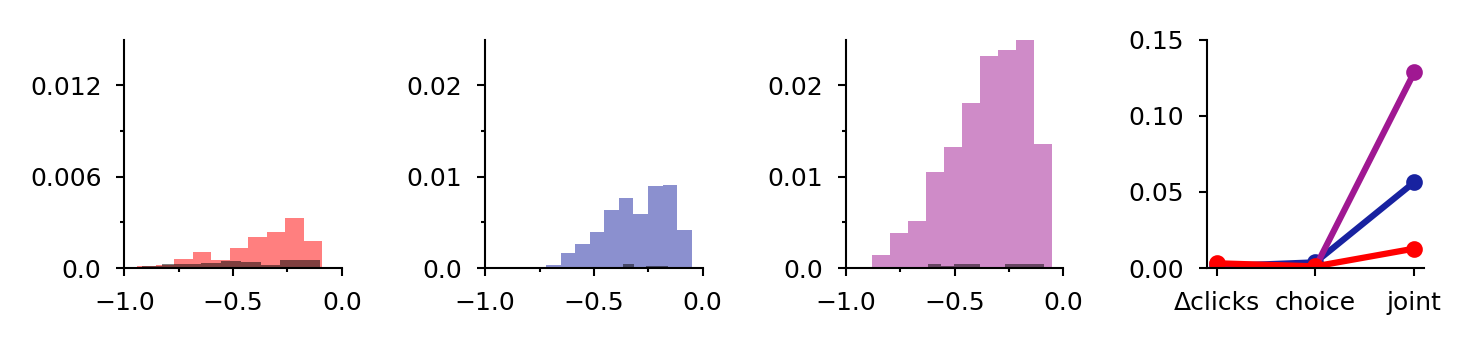

In [72]:
fig, ax = subplots(1, 4, figsize=(5, 1.25), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

subplot(1,4,1)
hist(vcat(diff_T_neural_FOF...) * dt, alpha=0.5, label="joint", color=mycolors[1])
hist(vcat(diff_T_LR_FOF...)* dt, alpha=0.5, label="ΔLR", color="black");

yticks([0, 100, 200], [0, round(100/length(ΔLR_FOF), digits=3), 
        round(200/length(ΔLR_FOF), digits=3)])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.set_ylim(0, 250)
xlim(-1,0)
ax.set_xticks(range(0, stop=-1., length=5), minor=true)
ax.set_yticks(range(0, stop=200., length=5), minor=true)
ax.tick_params(width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)

subplot(1,4,2)

hist(vcat(diff_T_neural_PPC...) * dt, alpha=0.5, label="joint", color=mycolors[2])
hist(vcat(diff_T_LR_PPC...)* dt, alpha=0.5, label="ΔLR", color="black");

yticks([0, 100, 200], [0, round(100/length(ΔLR_PPC), digits=2), 
        round(200/length(ΔLR_PPC), digits=2)])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.tick_params(width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)
ax.set_ylim(0, 250)
ax.set_xticks(range(0, stop=-1., length=5), minor=true)
ax.set_yticks(range(0, stop=200., length=5), minor=true)

subplot(1,4,3)

hist(vcat(diff_T_neural_STR...) * dt, alpha=0.5, label="joint", color=mycolors[3])
hist(vcat(diff_T_LR_STR...)* dt, alpha=0.5, label="ΔLR", color="black");
yticks([0, 100, 200], [0, round(100/length(ΔLR_STR), digits=2), 
        round(200/length(ΔLR_STR), digits=2)])

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
ax.set_xticks(range(0, stop=-1., length=5), minor=true)
ax.set_yticks(range(0, stop=200., length=5), minor=true)
ax.tick_params(which="major", width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)
ax.set_ylim(0, 250)

subplot(1,4,4)
plot([1,2,3], [sum(vcat(isevent_PPC_LR...))/length(ΔLR_PPC), 
    sum(vcat(isevent_PPC_choice...))/length(exp_PPC_choice_for),
    sum(vcat(isevent_PPC_neural...))/length(exp_PPC_neural)], color=mycolors[2],
    marker="o", markersize=3);
plot([1,2,3], [sum(vcat(isevent_STR_LR...))/length(ΔLR_STR), 
    sum(vcat(isevent_STR_choice...))/length(exp_STR_choice_for),
    sum(vcat(isevent_STR_neural...))/length(exp_STR_neural)], color=mycolors[3],
    marker="o", markersize=3);
plot([1,2,3], [sum(vcat(isevent_FOF_LR...))/length(ΔLR_FOF), 
        sum(vcat(isevent_FOF_choice...))/length(exp_FOF_choice_for),
    sum(vcat(isevent_FOF_neural...))/length(exp_FOF_neural)], color=mycolors[1],
    marker="o", markersize=3);

ax = gca()
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_ticks_position("bottom")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["bottom"].set_linewidth(0.5)
ax.spines["left"].set_linewidth(0.5)
xticks([1,2,3], ["Δclicks", "choice", "joint"], rotation=0)
ax.tick_params(width=0.5, length=2)
ax.tick_params(which="minor", width=0.5, length=1)
ax.set_ylim(0, 0.15)
ax.set_yticks(range(0, stop=0.15, length=4), minor=true)

tight_layout()
display(gcf())
close(gcf())
#PyPlot.savefig(joinpath(abspath(joinpath(pwd(), "..")), "figs/")*"Fig6D-E.pdf")

## Cpoke analysis

In [73]:
## number of trials that intersect where it says LR changed mind and neural changed mind

In [74]:
intersect(which_trials_STR_neural[any.(isevent_STR_neural)], which_trials_STR_LR[any.(isevent_STR_LR)])

6-element Vector{Int64}:
  172
 2606
 3077
 7976
 8911
 9920

In [75]:
intersect(which_trials_PPC_neural[any.(isevent_PPC_neural)], which_trials_PPC_LR[any.(isevent_PPC_LR)])

Int64[]

In [76]:
length(intersect(which_trials_FOF_neural[any.(isevent_FOF_neural)], which_trials_FOF_LR[any.(isevent_FOF_LR)])) / 
    length(which_trials_FOF_neural[any.(isevent_FOF_neural)])

0.013513513513513514

In [77]:
selected_cpokes_FOF = getindex(vcat(vec.(cpoke_out_FOF)...), which_trials_FOF_neural)[any.(isevent_FOF_neural)];

In [78]:
selected_cpokes_PPC = getindex(vcat(vec.(cpoke_out_PPC)...), which_trials_PPC_neural)[any.(isevent_PPC_neural)];

In [79]:
selected_cpokes_STR = getindex(vcat(vec.(cpoke_out_STR)...), which_trials_STR_neural)[any.(isevent_STR_neural)];

In [81]:
using DataFrames, GLM

In [82]:
findall(length.(diff_T_neural_FOF) .> 1)

Int64[]

In [83]:
ols_data_FOF = DataFrame(X=last.(diff_T_neural_FOF)[selected_cpokes_FOF .< 0.5]*dt, 
    Y=selected_cpokes_FOF[selected_cpokes_FOF .< 0.5]);

In [84]:
ols_FOF = lm(@formula(Y ~ X), ols_data_FOF)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.106976    0.0120248   8.90    <1e-15   0.0832753  0.130677
X            -0.0566851   0.0300765  -1.88    0.0608  -0.115966   0.00259593
────────────────────────────────────────────────────────────────────────────

In [85]:
pval = GLM.coeftable(ols_FOF).cols[4][2]

0.06081358833126986

In [86]:
ols_data_PPC = DataFrame(X=last.(diff_T_neural_PPC)[selected_cpokes_PPC .< 0.5]*dt, 
    Y=selected_cpokes_PPC[selected_cpokes_PPC .< 0.5]);
ols_PPC = lm(@formula(Y ~ X), ols_data_PPC)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.14815    0.00823662  17.99    <1e-55  0.131968    0.164333
X            0.0729485  0.0246671    2.96    0.0032  0.0244848   0.121412
─────────────────────────────────────────────────────────────────────────

In [87]:
pval = GLM.coeftable(ols_PPC).cols[4][2]

0.0032497572034322006

In [88]:
ols_data_STR = DataFrame(X=last.(diff_T_neural_STR)[selected_cpokes_STR .< 0.5] * dt, 
    Y=selected_cpokes_STR[selected_cpokes_STR .< 0.5]);
ols_STR = lm(@formula(Y ~ X), ols_data_STR)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.205731   0.00605512  33.98    <1e-99  0.193852   0.217609
X            0.0526425  0.0157293    3.35    0.0008  0.0217851  0.0834998
─────────────────────────────────────────────────────────────────────────

In [89]:
pval = GLM.coeftable(ols_STR).cols[4][2]

0.000840687741301318

In [90]:
yestrials_FOF = which_trials_FOF_neural[any.(isevent_FOF_neural)];
notrialsFOF = setdiff(1:length(find_diff_neural_FOF), which_trials_FOF_neural);

In [91]:
yestrials_PPC = which_trials_PPC_neural[any.(isevent_PPC_neural)];
notrialsPPC = setdiff(1:length(find_diff_neural_PPC), which_trials_PPC_neural);

In [92]:
yestrials_STR = which_trials_STR_neural[any.(isevent_STR_neural)];
notrialsSTR = setdiff(1:length(find_diff_neural_STR), which_trials_STR_neural);

In [93]:
using CategoricalArrays

In [94]:
labels = string.(1:10);

In [95]:
ys_PPC = map(x-> mean(vcat(vec.(cpoke_out_PPC)...)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
                length(labels), labels=labels) .== x]), labels);

In [96]:
LR_PPC = map(x-> mean(last.(ΔLR_PPC)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
                length(labels), labels=labels) .== x]), labels);

In [97]:
xs_PPC = map(x-> mean(last.(diff_T_neural_PPC)[cut(last.(diff_T_neural_PPC), 
                length(labels), labels=labels) .== x]), labels);

In [98]:
ys_FOF = map(x-> mean(vcat(vec.(cpoke_out_FOF)...)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
                length(labels), labels=labels) .== x]), labels);

xs_FOF = map(x-> mean(last.(diff_T_neural_FOF)[cut(last.(diff_T_neural_FOF), 
                length(labels), labels=labels) .== x]), labels);

In [99]:
LR_FOF = map(x-> mean(last.(ΔLR_FOF)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
                length(labels), labels=labels) .== x]), labels);

In [100]:
LR_STR = map(x-> mean(last.(ΔLR_STR)[yestrials_STR][cut(last.(diff_T_neural_STR), 
                length(labels), labels=labels) .== x]), labels);

In [101]:
ys_STR = map(x-> mean(vcat(vec.(cpoke_out_STR)...)[yestrials_STR][cut(last.(diff_T_neural_STR), 
                length(labels), labels=labels) .== x]), labels);
xs_STR = map(x-> mean(last.(diff_T_neural_STR)[cut(last.(diff_T_neural_STR), 
                length(labels), labels=labels) .== x]), labels);

## CoM linear regress vs boxplots

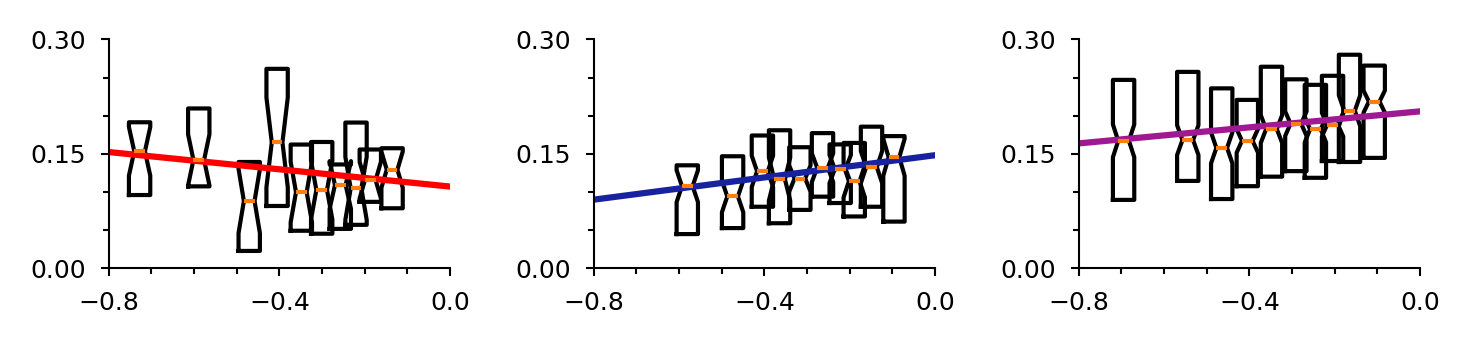

In [102]:
fig, ax = subplots(1, 3, figsize=(5, 1.25), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

ax[1].boxplot(map(x-> (vcat(vec.(cpoke_out_FOF)...)[yestrials_FOF][cut(last.(diff_T_neural_FOF), 
            length(labels), labels=labels) .== x]), labels), positions=xs_FOF*dt, 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)

ax[1].plot(range(-0.8, stop=0, length=100), 
    predict(ols_FOF, DataFrame(X=range(-0.8, stop=0, length=100))), color=mycolors[1])

ax[1].xaxis.set_ticks_position("bottom")
ax[1].xaxis.set_ticks_position("bottom")
ax[1].spines["right"].set_visible(false)
ax[1].spines["top"].set_visible(false)
ax[1].spines["bottom"].set_linewidth(0.5)
ax[1].spines["left"].set_linewidth(0.5)
ax[1].set_xticks(range(-0.8, stop=0, length=3), minor=false)
ax[1].set_xticks(range(-0.8, stop=0, length=9), minor=true)
ax[1].set_yticks(range(0, stop=0.3, length=3), minor=false)
ax[1].set_yticks(range(0, stop=0.3, length=7), minor=true)
ax[1].tick_params(width=0.5, length=2)
ax[1].tick_params(which="minor", width=0.5, length=1.5)
ax[1].set_xlim(-0.8, 0.0)

ax[2].boxplot(map(x-> (vcat(vec.(cpoke_out_PPC)...)[yestrials_PPC][cut(last.(diff_T_neural_PPC), 
            length(labels), labels=labels) .== x]), labels), positions=xs_PPC*dt, 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
ax[2].plot(range(-0.8, stop=0, length=100), 
    predict(ols_PPC, DataFrame(X=range(-0.8, stop=0, length=100))), color=mycolors[2])

ax[2].xaxis.set_ticks_position("bottom")
ax[2].xaxis.set_ticks_position("bottom")
ax[2].spines["right"].set_visible(false)
ax[2].spines["top"].set_visible(false)
ax[2].spines["bottom"].set_linewidth(0.5)
ax[2].spines["left"].set_linewidth(0.5)
ax[2].set_xticks(range(-0.8, stop=0, length=3), minor=false)
ax[2].set_xticks(range(-0.8, stop=0, length=9), minor=true)
ax[2].set_yticks(range(0, stop=0.3, length=3), minor=false)
ax[2].set_yticks(range(0, stop=0.3, length=7), minor=true)
ax[2].tick_params(width=0.5, length=2)
ax[2].tick_params(which="minor", width=0.5, length=1.5)
ax[2].set_xlim(-0.8, 0.0)

ax[3].boxplot(map(x-> (vcat(vec.(cpoke_out_STR)...)[yestrials_STR][cut(last.(diff_T_neural_STR), 
            length(labels), labels=labels) .== x]), labels), positions=xs_STR*dt, 
            widths=0.05, notch=true, showfliers=false, showcaps=false, whis=[25,75],
            manage_ticks=false)
ax[3].plot(range(-0.8, stop=0, length=100), 
    predict(ols_STR, DataFrame(X=range(-0.8, stop=0, length=100))), color=mycolors[3])

ax[3].xaxis.set_ticks_position("bottom")
ax[3].xaxis.set_ticks_position("bottom")
ax[3].spines["right"].set_visible(false)
ax[3].spines["top"].set_visible(false)
ax[3].spines["bottom"].set_linewidth(0.5)
ax[3].spines["left"].set_linewidth(0.5)
ax[3].set_xticks(range(-0.8, stop=0, length=3), minor=false)
ax[3].set_xticks(range(-0.8, stop=0, length=9), minor=true)
ax[3].set_yticks(range(0, stop=0.3, length=3), minor=false)
ax[3].set_yticks(range(0, stop=0.3, length=7), minor=true)
ax[3].tick_params(width=0.5, length=2)
ax[3].tick_params(which="minor", width=0.5, length=1.5)
ax[3].set_xlim(-0.8, 0.0)

tight_layout()
display(gcf())
close(gcf())
#PyPlot.savefig(joinpath(abspath(joinpath(pwd(), "..")), "figs/")*"Fig6F.pdf")